# Preprocessing IMDB Dataset
# ML Project Phase 2 Submission



Group Members: -

Name: - Priyanka R Wakte
Student Id :- 1001920878
Email Id :- prw0878@mavs.uta.edu

Name: - Harideep Thalla
Student Id :- 1001947439
Email Id :- hxt7439@mavs.uta.edu

Name: - Rahul Mogillapalli
Student Id :-1001957535
Email Id :- Rxm7353@mavs.uta.edu



# Sentiment Analysis on IMDB Reviews


In [2]:
import pandas as pd
import numpy as np
import os
import csv 
import numpy as np
from pandas import DataFrame, read_csv
from nltk.corpus import stopwords
from matplotlib import pyplot
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer 
from nltk.stem import PorterStemmer 
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def tokenize(t):
    
    t = re.sub("\\s", " ", t)
    
    t = re.sub("[^a-z' ]", "", t) 
    
    t = t.lower()
       
    w_bow = word_tokenize(t)
    bow = []
    for k in w_bow:
        if k not in stop_words:
            bow.append(k)
            
    sstem = SnowballStemmer(language='english')
    pstem = PorterStemmer()
    lstem = LancasterStemmer()
    
    for word in bow:    
        pstem_text=pstem.stem(word)
        sstem_text=sstem.stem(word)
        lstem_text=lstem.stem(word)

    final_bow=[]
    
    lemmatizer = WordNetLemmatizer()
    for word in bow:
      final_bow.append(lemmatizer.lemmatize(word))

    return final_bow

In [22]:
def load_dt(dirname):
    a, b = [], []
    
    for a_val, b_label in enumerate(['neg', 'pos']):
        b_dir = os.path.join(dirname, b_label)
        for filename in os.listdir(b_dir):
            filepath = os.path.join(b_dir, filename)
            with open(filepath,encoding="UTF-8" ) as f:
                bow = tokenize(f.read())
            a.append(bow)
            b.append(a_val) 
    return a, b

In [23]:
atrain, btrain = load_dt('C:/Users/priya/OneDrive - University of Texas at Arlington/Documents/Machine Learning/aclImdb/train/')


In [24]:
text="What a hell of a way to kick off the character of Tony Stark aka Iron-Man as well as the Marvel Cinematic Universe, little did we know it at the time of this movie's release but it had quite a big burden riding on its success. RDJ was born to play this part, I mean that's just how perfect he fits and plays the character of Tony Stark aka Iron-Man, giving one of the most personal performances of his career I'd imagine, considering just how perfectly he fills out the character. Jon Favreau showed his talents as an action movie director in this career-launching of a movie for both Favreau and RDJ, this was the perfect summer action movie blockbuster with a well-written lead character and an action-packed story from literal start to finish. Now, the villain isn't very fleshed out in regards to his motives or of switching sides, Jeff Bridges gives a competent performance as Obadiah Stane but he definitely doesn’t come to life like RDJ's performance as Iron-Man but still not a bad performance in any regard. This is a must-watch for any Marvel, Iron-Man, MCU, or action movie fans alike, so if for some reason you've been living under a rock for the last 13 years and you have yet to watch the 24 film entry franchise launching of a movie, then I strongly recommend you go out and find yourself a copy of this high octane, action-packed, and career re-starting movie and enjoy yourself"
bow=tokenize(text)
print(bow)


['hat', 'hell', 'way', 'kick', 'character', 'ony', 'tark', 'aka', 'ronan', 'well', 'arvel', 'inematic', 'niverse', 'little', 'know', 'time', 'movie', "'s", 'release', 'quite', 'big', 'burden', 'riding', 'success', 'born', 'play', 'part', 'mean', "'s", 'perfect', 'fit', 'play', 'character', 'ony', 'tark', 'aka', 'ronan', 'giving', 'one', 'personal', 'performance', 'career', "'d", 'imagine', 'considering', 'perfectly', 'fill', 'character', 'avreau', 'showed', 'talent', 'action', 'movie', 'director', 'careerlaunching', 'movie', 'avreau', 'perfect', 'summer', 'action', 'movie', 'blockbuster', 'wellwritten', 'lead', 'character', 'actionpacked', 'story', 'literal', 'start', 'finish', 'ow', 'villain', "n't", 'fleshed', 'regard', 'motif', 'switching', 'side', 'eff', 'ridge', 'give', 'competent', 'performance', 'badiah', 'tane', 'definitely', 'doesnt', 'come', 'life', 'like', "'s", 'performance', 'ronan', 'still', 'bad', 'performance', 'regard', 'mustwatch', 'arvel', 'ronan', 'action', 'movie',

In [15]:
def imdb_data_preprocess(inpath, outpath="./", name="imdb_tr.csv", mix=False):
    global stoplist
    stoplist = set(stopwords.words("english"))
    review = []
    polarity = []

    

    for filename in os.listdir(inpath+"pos"):
        data = open(inpath+"pos/"+filename, 'r' , encoding="ISO-8859-1").read()
        data = re.sub("[^a-z' ]", "", data)
        data = re.sub("\\s", " ", data) 
        data = del_stpwrds(data, stoplist)
        
        review.append(data)
        polarity.append("Positive")
        

    for filename in os.listdir(inpath+"neg"):
        data = open(inpath+"neg/"+filename, 'r' , encoding="ISO-8859-1").read()
        data = re.sub("[^a-z' ]", "", data)
        data = re.sub("\\s", " ", data) 
        data = del_stpwrds(data, stoplist)
        
        review.append(data)
        polarity.append("Negative")
        

    Dataset = list(zip(review,polarity))

    if mix:
        np.random.shuffle(Dataset)

    df = pd.DataFrame(data = Dataset, columns=['review', 'polarity'])
    df.to_csv(outpath+name, index=False, header=True)
    pass


In [16]:
def del_stpwrds(sentence, stopwords):
    sentences = sentence.split()
    reswords  = [word for word in sentences if word.lower() not in stopwords]
    r = ' '.join(reswords)
    return r

In [17]:
imdb_data_preprocess(inpath='C:/Users/priya/OneDrive - University of Texas at Arlington/Documents/Machine Learning/aclImdb/train/', mix=True)

In [18]:
df = pd.read_csv('C:/Users/priya/OneDrive - University of Texas at Arlington/Documents/Machine Learning/aclImdb/imdb_tr.csv')
df

,review,polarity
0,rue tory f riendship hat hook outh frica nd wa...,Positive
1,ow hired movie rad ourif e excellent actor eve...,Negative
2,e go appointment turned record ending fter loo...,Negative
3,idea r zzard damn funny really boggles mind we...,Positive
4,nyone familiar reviews nternet ovie atabase kn...,Negative
...,...,...
24995,film best film im arrey ever made arrey usual ...,Positive
24996,must say saw trailer excited uturistic soldier...,Negative
24997,found orrorvision almost unwatchable hile minu...,Negative
24998,noticed amusement end credits etroit thanked p...,Negative


In [19]:
#df1 = df[df['polarity']==1]
df['totalwords'] = [len(x.split()) for x in df['review'].tolist()]
df

,review,polarity,totalwords
0,rue tory f riendship hat hook outh frica nd wa...,Positive,428
1,ow hired movie rad ourif e excellent actor eve...,Negative,51
2,e go appointment turned record ending fter loo...,Negative,82
3,idea r zzard damn funny really boggles mind we...,Positive,23
4,nyone familiar reviews nternet ovie atabase kn...,Negative,127
...,...,...,...
24995,film best film im arrey ever made arrey usual ...,Positive,71
24996,must say saw trailer excited uturistic soldier...,Negative,144
24997,found orrorvision almost unwatchable hile minu...,Negative,43
24998,noticed amusement end credits etroit thanked p...,Negative,124


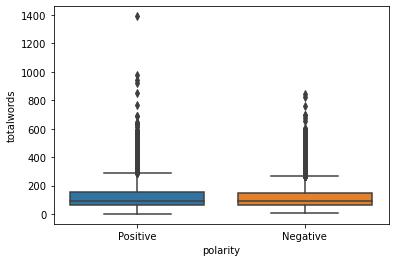

In [20]:
ax = sns.boxplot(x="polarity", y="totalwords", data=df)